# Loan Approval Prediction Model

About the Data Set
1. **ApplicantID**: Unique identifier for each applicant.
2. **Gender**: Applicant's gender.
3. **Married**: Applicant's marital status.
4. **Dependents**: Number of dependents.
5. **Education**: Education level (Graduate/Not Graduate).
6. **SelfEmployed**: Whether the applicant is self-employed.
7. **ApplicantIncome**: Income of the applicant.
8. **CoapplicantIncome**: Income of the co-applicant.
9. **LoanAmount**: Amount of the loan applied for.
10. **Loan_Amount_Term**: Duration of the loan in months.
11. **Credit_History**: Credit history (1 for good, 0 for bad).
12. **Loan_Status**: Whether the loan was approved (Yes/No).


**Objective**: Predict whether a loan will be approved or not based on the applicant's profile (e.g., income, credit history, education).
   - **Approach**: Use machine learning techniques such as logistic regression, decision trees, or random forests to build a classification model. The target variable would be `Loan_Status`, and features could include `ApplicantIncome`, `CoapplicantIncome`, `Credit_History`, and more.
   - **Outcome**: Develop a model to assist financial institutions in making informed decisions about loan approvals.


In [53]:
import pandas as pd
df= pd.read_csv("loan_approval_prediction.csv")

In [54]:
df.dtypes

ApplicantID          object
Gender               object
Married              object
Dependents           object
Education            object
SelfEmployed         object
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Loan_Status          object
dtype: object

### EDA

#### Univariate Analysis

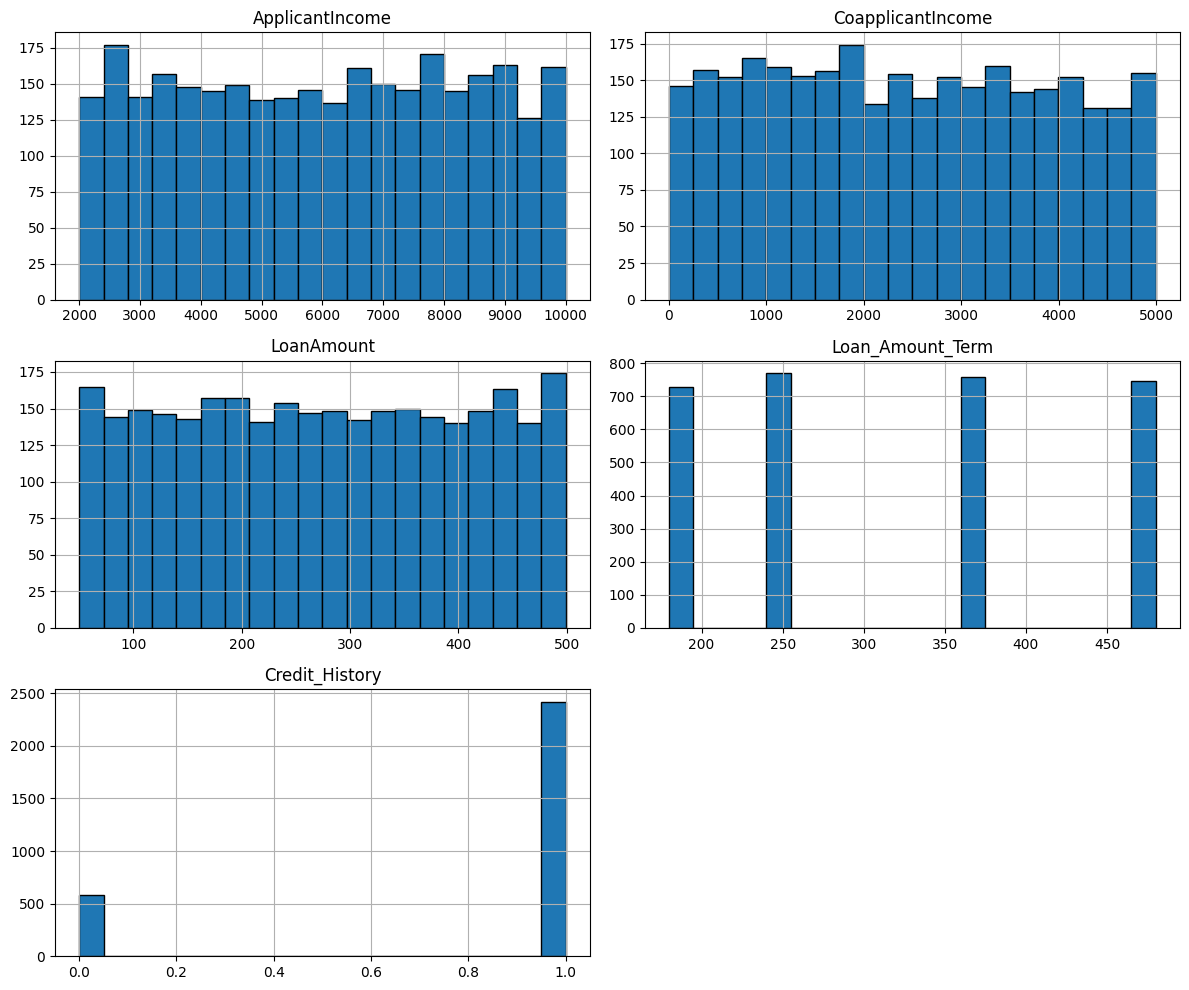

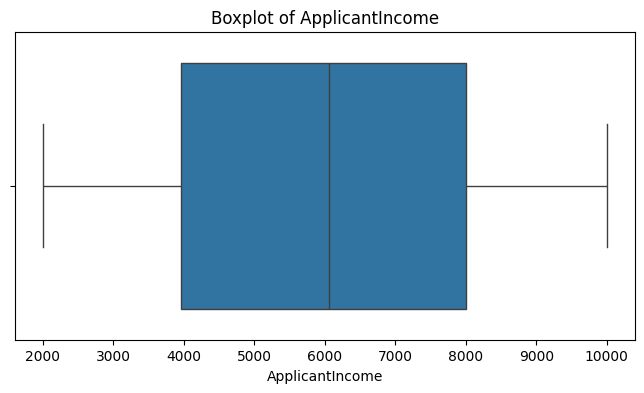

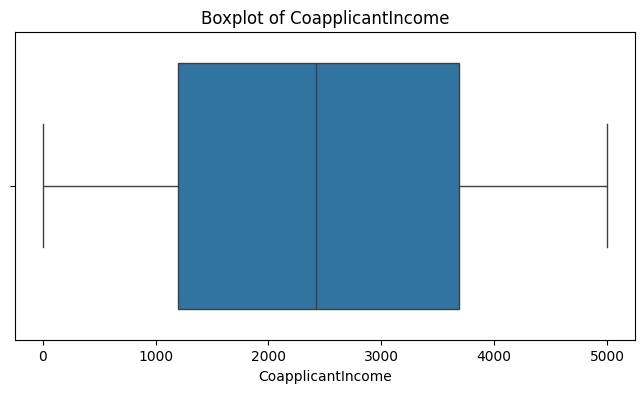

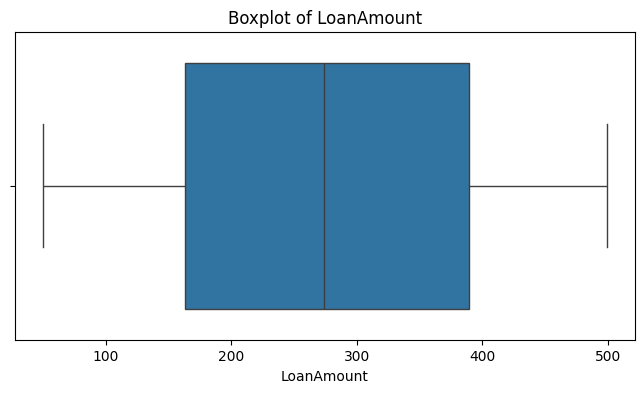

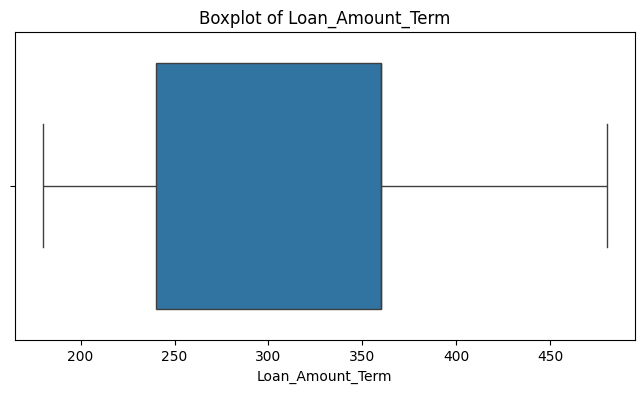

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Boxplots for numerical features
for column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


#### Categorical Features

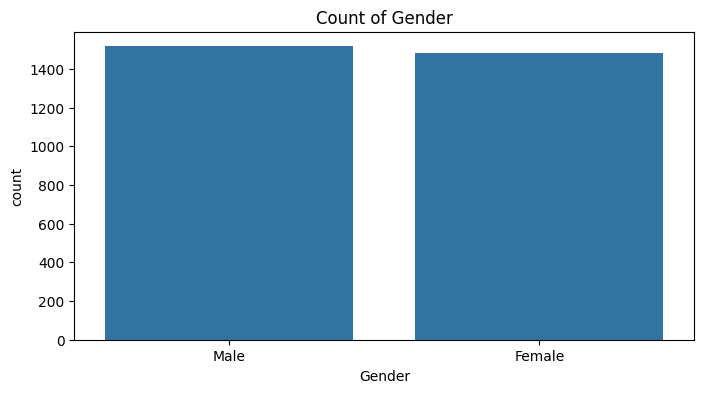

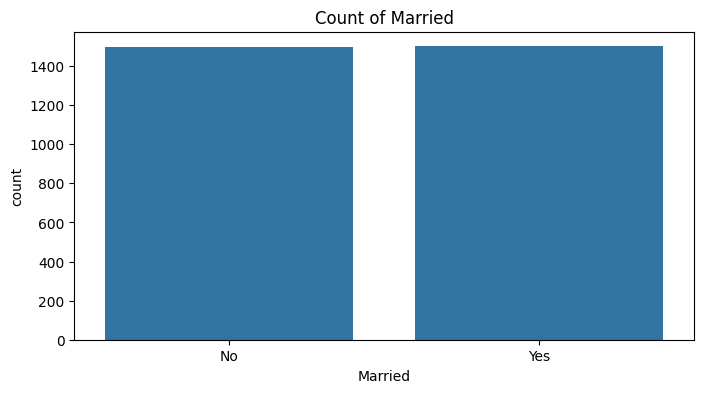

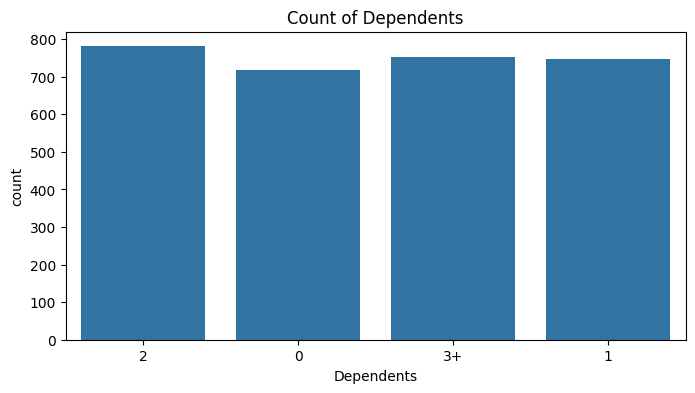

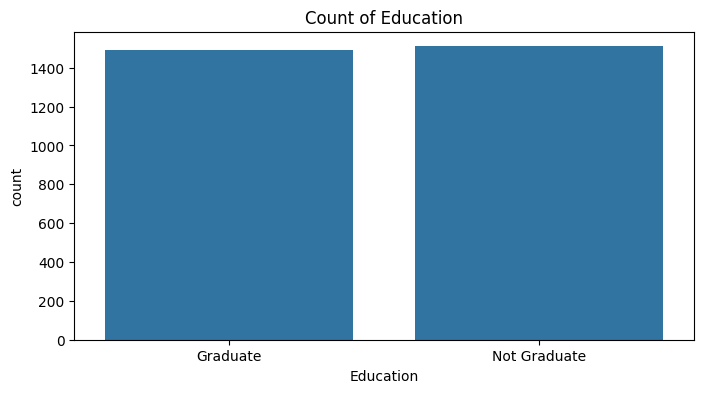

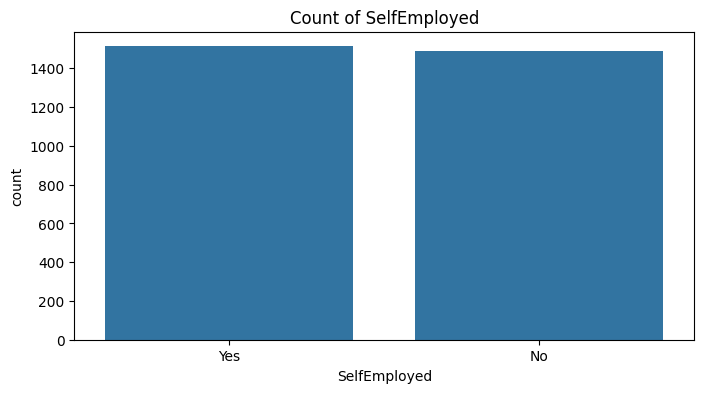

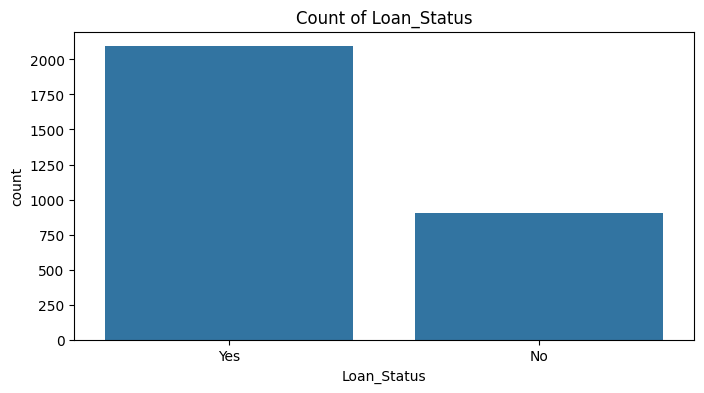

In [56]:
# Count plots for categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'SelfEmployed', 'Loan_Status']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature)
    plt.title(f'Count of {feature}')
    plt.show()


#### Bivariate Analysis(Num vs Loan status)

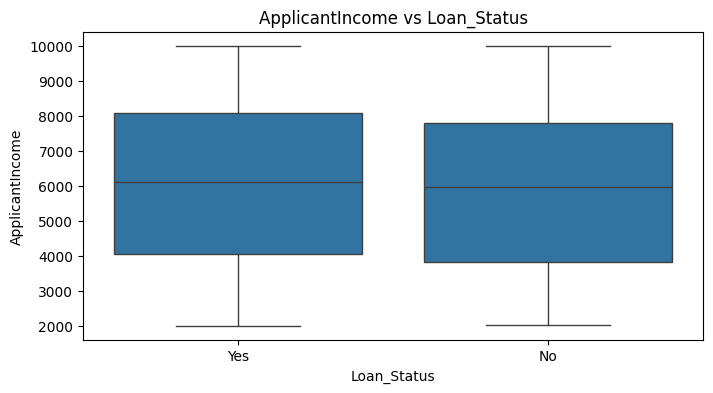

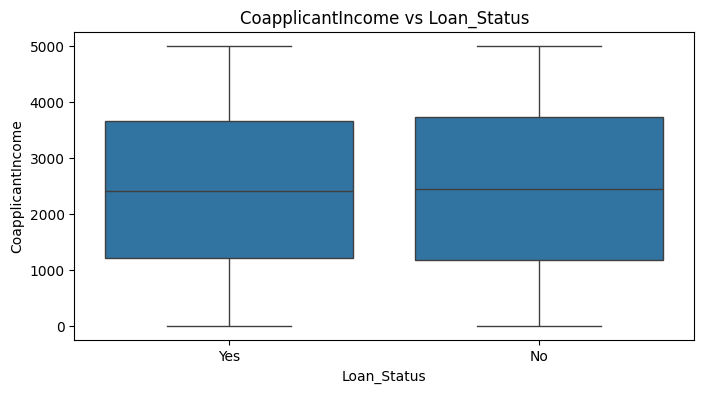

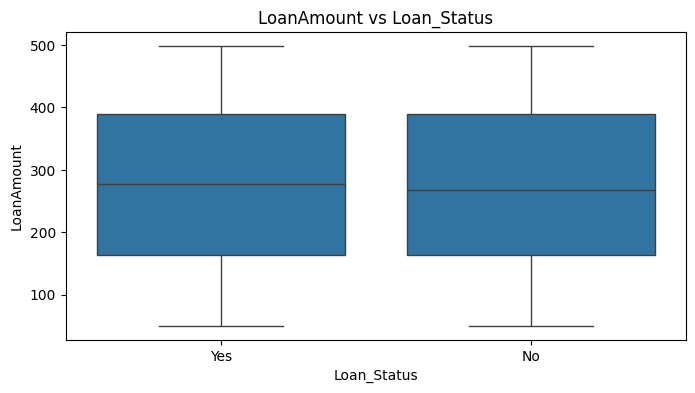

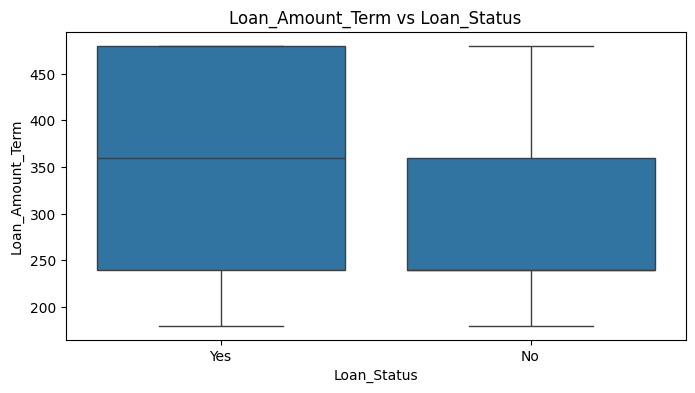

In [57]:
# Boxplots for numerical features vs. Loan_Status
for column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df['Loan_Status'], y=df[column])
    plt.title(f'{column} vs Loan_Status')
    plt.show()


## Level Encoding

In [58]:
df = df.drop(columns=['ApplicantID'])


In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['SelfEmployed'] = le.fit_transform(df['SelfEmployed'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])


#### Bivariate Analysis (cat vs Loan status)

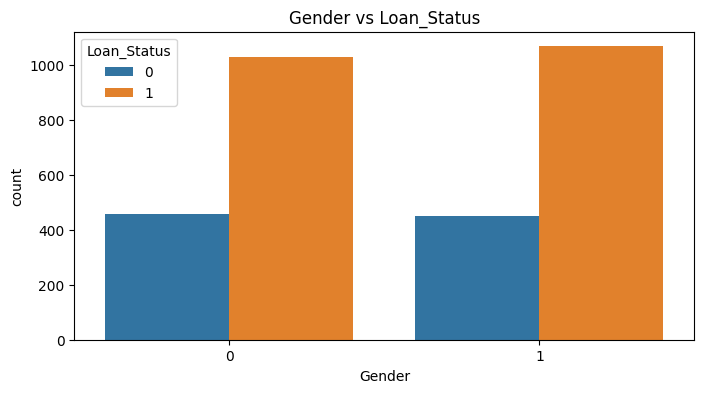

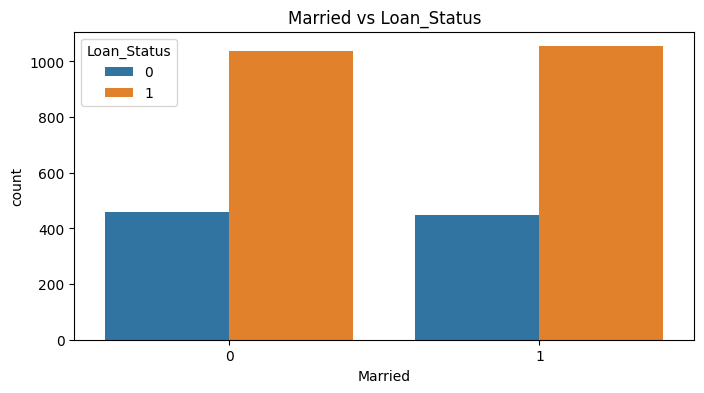

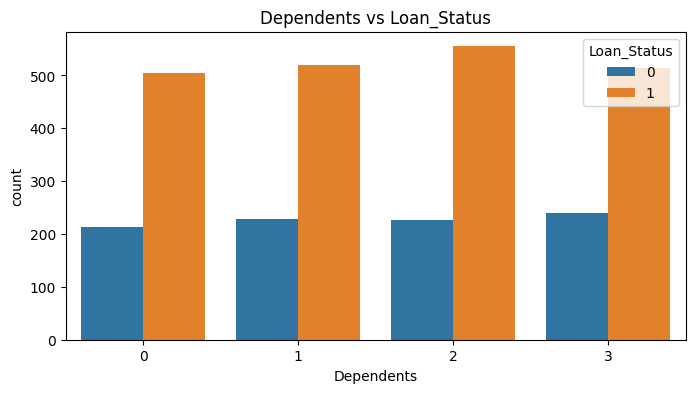

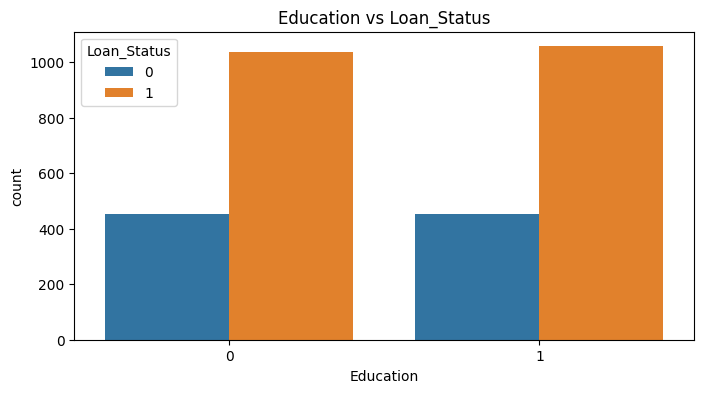

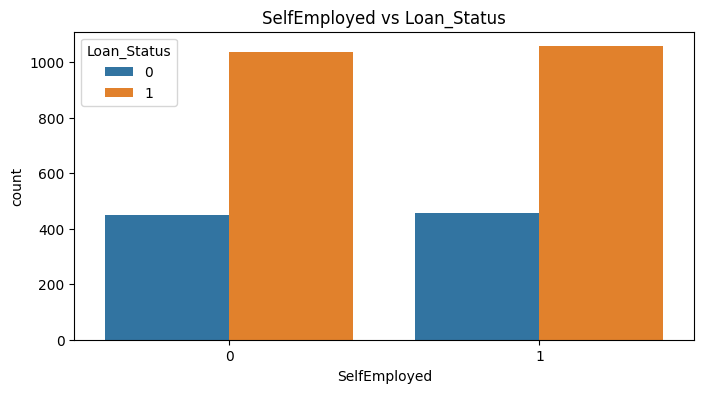

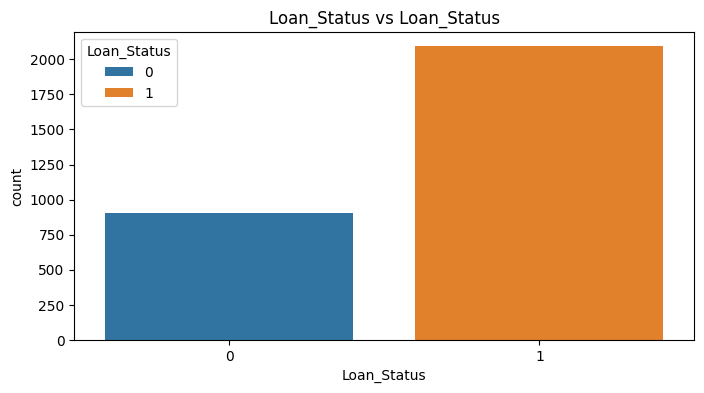

In [60]:
# Count plots for categorical features vs. Loan_Status
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue='Loan_Status')
    plt.title(f'{feature} vs Loan_Status')
    plt.show()


#### Pair Plot

c:\Users\aneek\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


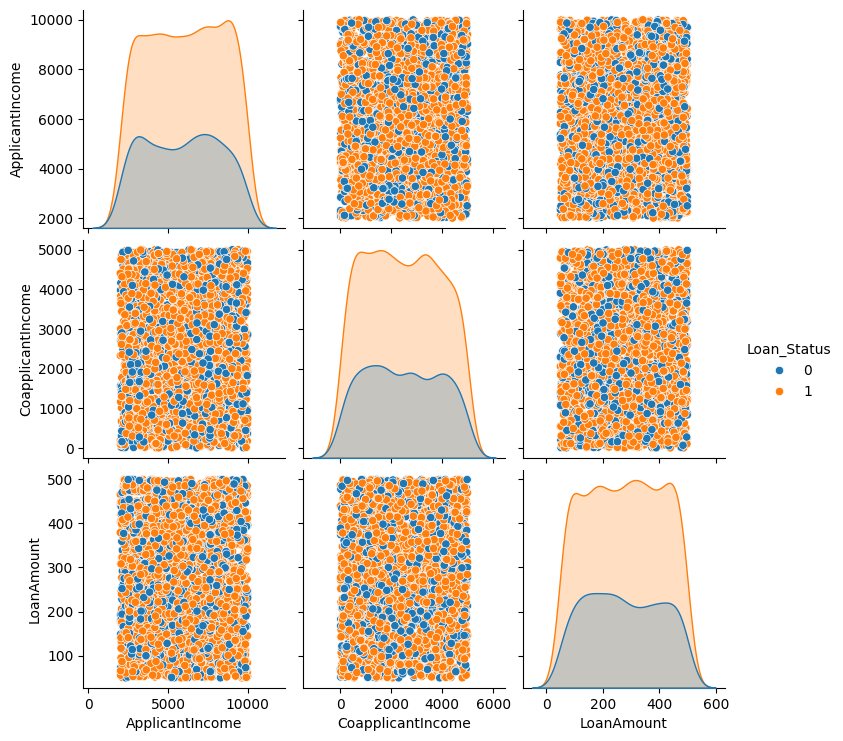

In [61]:
# Pairplot for some key features
sns.pairplot(df, hue='Loan_Status', vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])
plt.show()


### Feature Engineering

In [62]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['IncomeToLoanRatio'] = df['TotalIncome'] / df['LoanAmount']
df['LoanTermYears'] = df['Loan_Amount_Term'] / 12
df['Dependents'] = df['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3})


### Scaling

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['TotalIncome', 'LoanAmount', 'IncomeToLoanRatio', 'LoanTermYears', 'Dependents']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


### Multicolinearity Check

Loan_Status          1.000000
ApplicantIncome      0.032683
TotalIncome          0.027203
IncomeToLoanRatio    0.025949
Gender               0.011090
Married              0.009874
Credit_History       0.004864
LoanTermYears        0.004674
Loan_Amount_Term     0.004674
Education            0.003663
LoanAmount           0.003488
SelfEmployed         0.000625
CoapplicantIncome   -0.001550
Dependents          -0.010429
Name: Loan_Status, dtype: float64


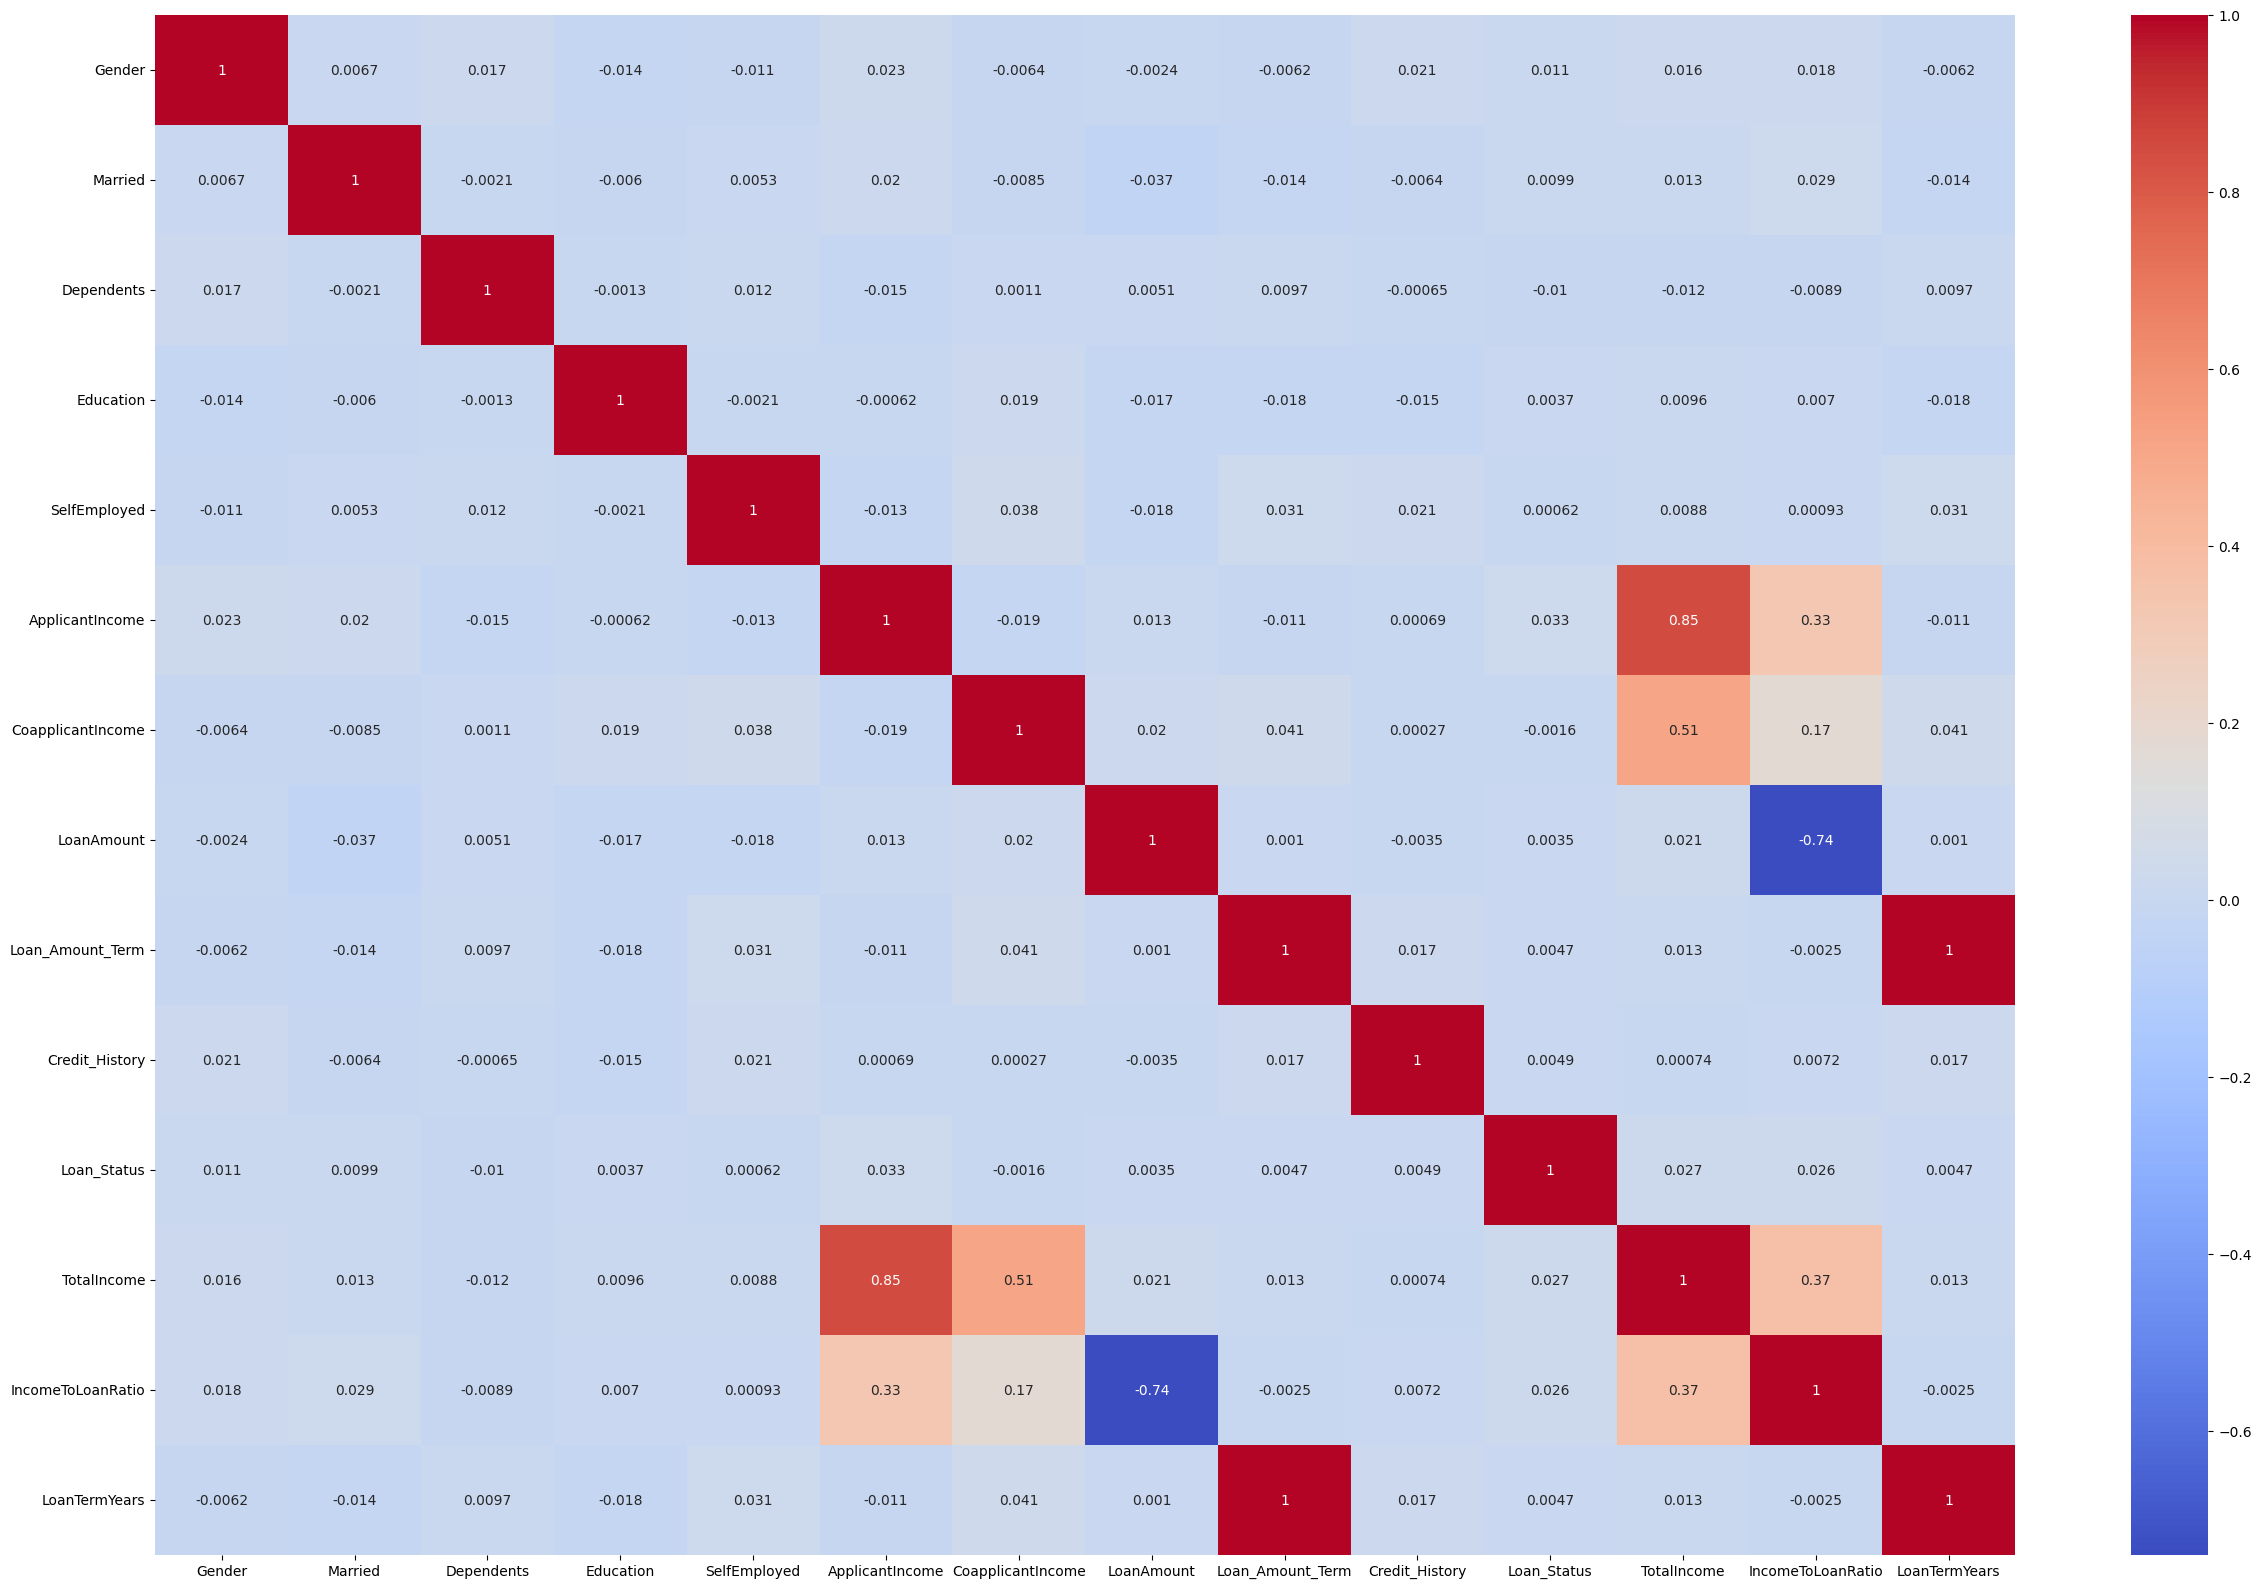

In [64]:
correlation_matrix = df.corr()
print(correlation_matrix['Loan_Status'].sort_values(ascending=False))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [65]:
df = df.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'])


In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Prepare a DataFrame for VIF calculation
X = df.drop(columns=['Loan_Status'])  # Exclude the target variable
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)  # Scale the features

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


             Feature       VIF
0             Gender  1.001721
1            Married  1.001929
2         Dependents  1.000730
3          Education  1.001461
4       SelfEmployed  1.002946
5         LoanAmount  2.869826
6     Credit_History  1.001488
7        TotalIncome  1.506634
8  IncomeToLoanRatio  3.329694
9      LoanTermYears  1.002171


### PCA

1. Prepare the Data


In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop the target variable for PCA
X = df.drop(columns=['Loan_Status'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


2. Apply PCA

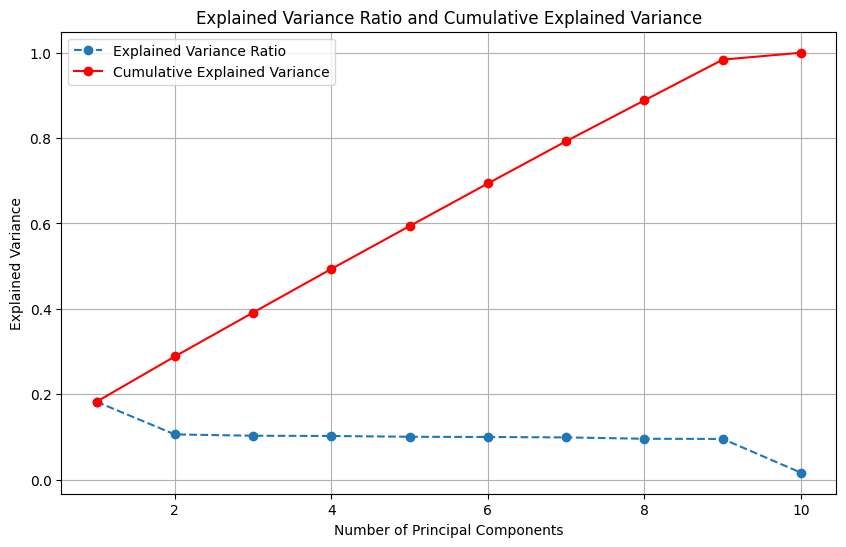

In [68]:
# Initialize PCA
pca = PCA()

# Fit PCA to the scaled data
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot explained variance ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='r', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Ratio and Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


3. Determine the number of PCA

In [69]:
# Determine the number of components to retain 95% variance
n_components = next(i for i, total in enumerate(cumulative_explained_variance) if total >= 0.95) + 1
print(f'Number of components to retain 95% variance: {n_components}')


Number of components to retain 95% variance: 9


4. Transform the data as per PCA

In [70]:
# Initialize PCA with the selected number of components
pca = PCA(n_components=n_components)

# Fit and transform the data
X_pca_selected = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(X_pca_selected, columns=[f'PC{i+1}' for i in range(n_components)])

# Append the target variable
pca_df['Loan_Status'] = df['Loan_Status'].values


5. Visualize Principle Component (Pair wise)

c:\Users\aneek\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


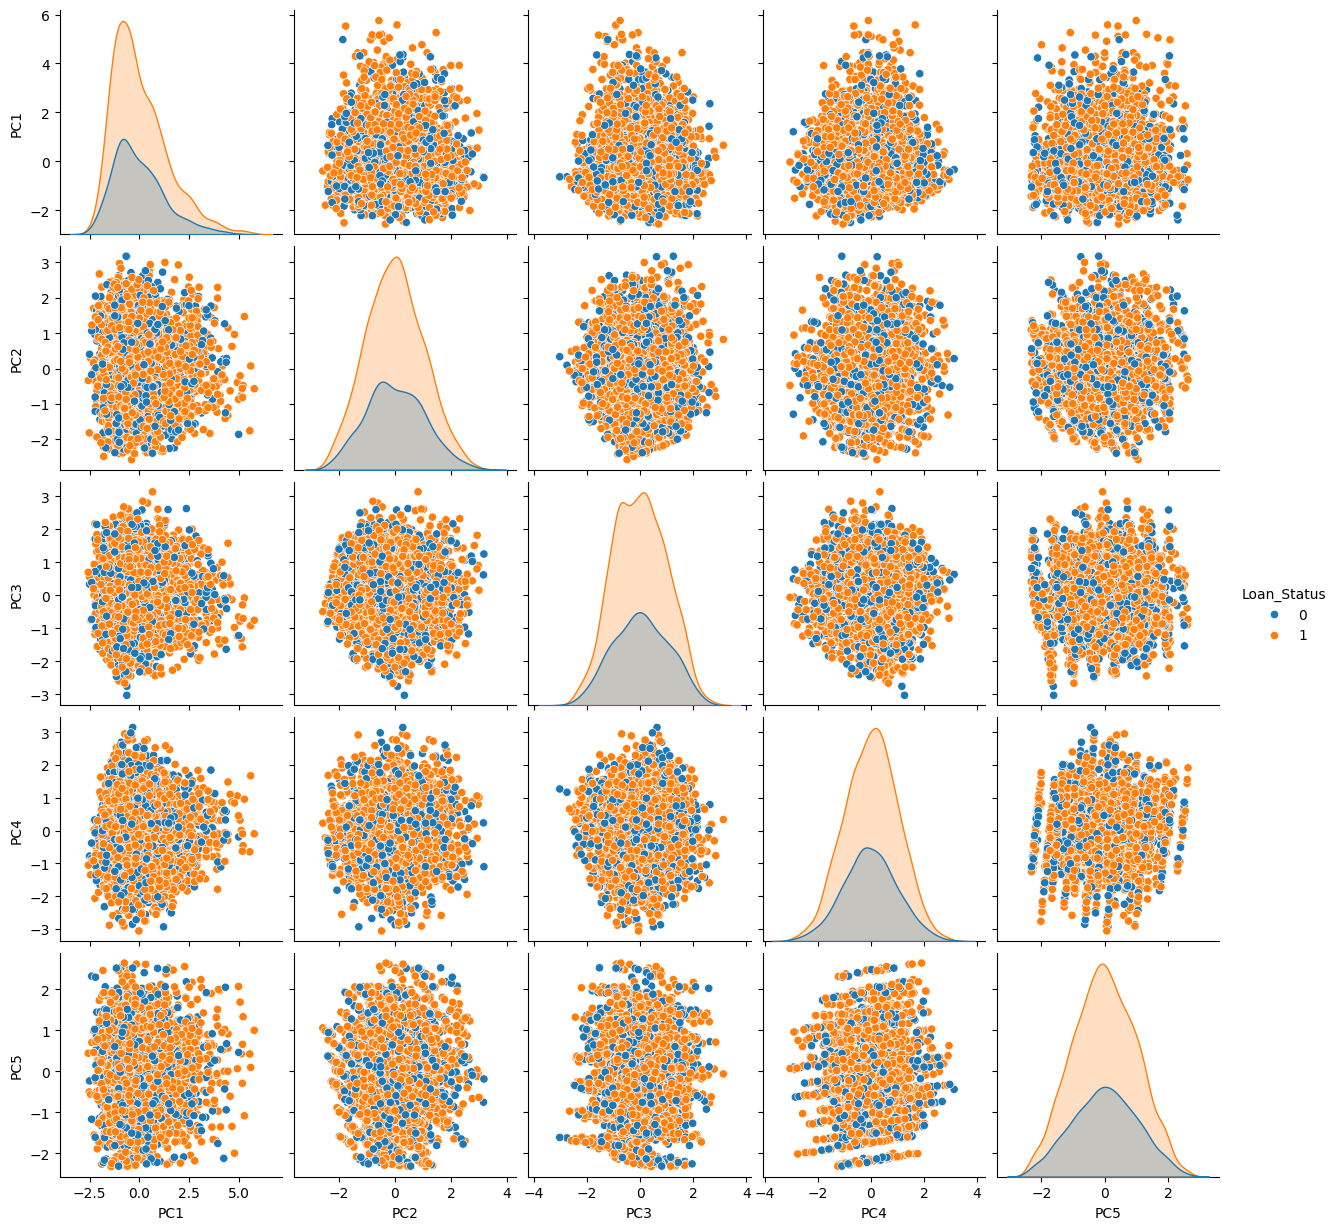

In [71]:
# Pairplot for the first few principal components
import seaborn as sns

# Select the first few principal components for pairplot
pca_df_9_subset = pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Loan_Status']]

sns.pairplot(pca_df_9_subset, hue='Loan_Status')
plt.show()


6. Visualize Principle Component (TSNE)

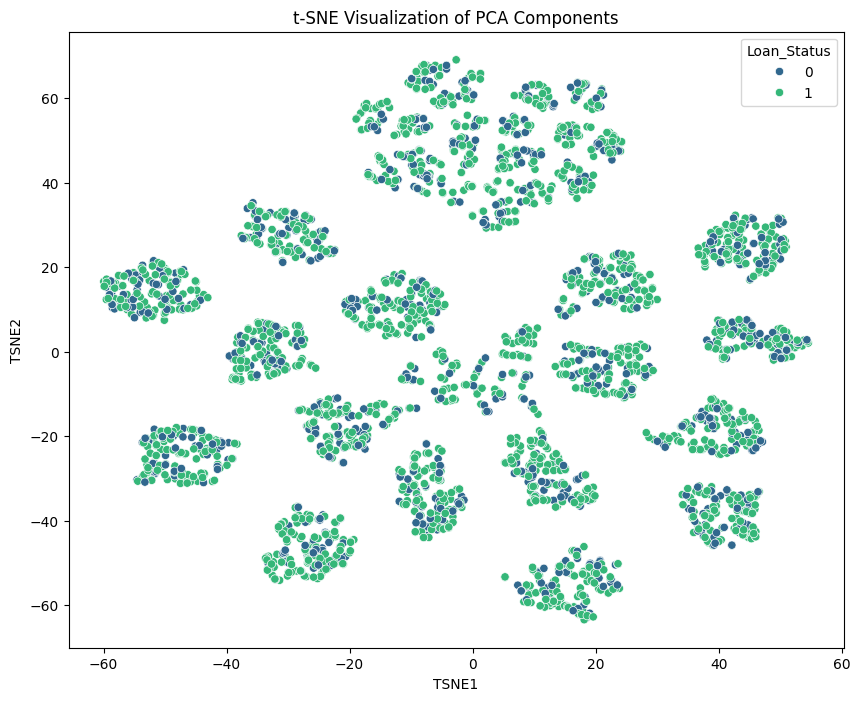

In [72]:
from sklearn.manifold import TSNE

# Apply t-SNE to the PCA components
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Loan_Status'] = df['Loan_Status'].values

# Plot t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Loan_Status', palette='viridis')
plt.title('t-SNE Visualization of PCA Components')
plt.show()


7. Analyze Component Loadings


In [73]:
# Print the components to understand feature contributions
components_df = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(9)])
print(components_df)


       Gender   Married  Dependents  Education  SelfEmployed  LoanAmount  \
PC1  0.022960  0.058194   -0.015487   0.021297      0.018147   -0.631594   
PC2 -0.196291  0.103568   -0.221514   0.342607     -0.468417   -0.070949   
PC3 -0.674177 -0.120211   -0.019411   0.224554      0.415660   -0.232446   
PC4 -0.264680 -0.324935   -0.370385   0.242175      0.015680    0.323596   
PC5  0.191753 -0.360162    0.745582   0.472001      0.004237    0.022234   
PC6 -0.059161  0.764809    0.211725   0.052023      0.363749    0.162205   
PC7 -0.158966 -0.135497    0.199157  -0.624297     -0.320835   -0.026557   
PC8  0.262547  0.279319   -0.186677   0.396867     -0.380513   -0.080153   
PC9  0.549422 -0.234008   -0.371344  -0.015568      0.476361   -0.080896   

     Credit_History  TotalIncome  IncomeToLoanRatio  LoanTermYears  
PC1        0.009419     0.306534           0.708590       0.000840  
PC2       -0.482855    -0.144204           0.000929      -0.553085  
PC3       -0.113271    -0.421758

### Model Building

In [74]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Features and target variable
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']
# Split the data
X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [75]:
print(f'Training data shape: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Testing data shape: X_test: {X_test.shape}, y_test: {y_test.shape}')


Training data shape: X_train: (3348, 10), y_train: (3348,)
Testing data shape: X_test: (838, 10), y_test: (838,)


1. Basic - Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

2. Intermediate - Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)


3. Advance - GBM

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))


Confusion Matrix:
[[188 241]
 [ 72 337]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.44      0.55       429
           1       0.58      0.82      0.68       409

    accuracy                           0.63       838
   macro avg       0.65      0.63      0.61       838
weighted avg       0.65      0.63      0.61       838



In [79]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, precision_recall_curve, roc_curve, roc_auc_score, auc, matthews_corrcoef

# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=100,random_state=46,class_weight='balanced'),
    'Random Forest': RandomForestClassifier(max_depth=100, random_state=46, class_weight='balanced'),
    'GBM': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=46),
    'Support Vector Classifier': SVC(probability=True, random_state=46, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(random_state=46, max_iter=10000, class_weight='balanced'),
}

# Dictionary to store model performance
performance = {}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # For probability-based metrics

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # PR AUC
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    
    # ROC AUC
    roc_auc = roc_auc_score(y_test, y_prob)

    # Store the performance
    performance[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Recall': recall,
        'Precision': precision,
        'Cohen Kappa Score': kappa,
        'PR AUC': pr_auc,
        'ROC AUC': roc_auc,
        'MCC': mcc,
    }

# Find the best and second-best models based on each metric
best_models = {}
second_best_models = {}

for metric in performance[list(models.keys())[0]].keys():
    sorted_models = sorted(performance.items(), key=lambda x: x[1][metric], reverse=True)
    best_model = sorted_models[0]
    second_best_model = sorted_models[1]
    
    best_models[metric] = (best_model[0], best_model[1][metric])
    second_best_models[metric] = (second_best_model[0], second_best_model[1][metric])

print("\nBest Models Based on Each Metric:")
for metric, (best_model, score) in best_models.items(): 
    print(f"{metric}: {best_model} with {score:.4f}")

print("\nSecond Best Models Based on Each Metric:")
for metric, (second_best_model, score) in second_best_models.items():
    print(f"{metric}: {second_best_model} with {score:.4f}")


print(f1_score)


Best Models Based on Each Metric:
Accuracy: Random Forest with 0.7088
F1 Score: Random Forest with 0.7088
Recall: Random Forest with 0.7091
Precision: Random Forest with 0.7090
Cohen Kappa Score: Random Forest with 0.4179
PR AUC: Decision Tree with 0.7310
ROC AUC: Random Forest with 0.7787
MCC: Random Forest with 0.4182

Second Best Models Based on Each Metric:
Accuracy: Decision Tree with 0.6516
F1 Score: Decision Tree with 0.6515
Recall: Decision Tree with 0.6515
Precision: GBM with 0.6531
Cohen Kappa Score: Decision Tree with 0.3029
PR AUC: Random Forest with 0.7145
ROC AUC: GBM with 0.6724
MCC: Decision Tree with 0.3030
<function f1_score at 0x0000027AE12D0C10>


### Tunning

In [88]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']  # Set max_features to a valid value
}

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.73143402925274


### Evaluation
**Data Exploration and Preprocessing**
The dataset is explored using various visualization techniques, including histograms, box plots, and count plots.
The data is preprocessed by encoding categorical variables, scaling numerical features, and handling missing values.

**Feature Engineering**

New features are created, including TotalIncome, IncomeToLoanRatio, and LoanTermYears, to capture more information about the applicants and loans.

**Model Building and Evaluation**

Three machine learning models are built: Logistic Regression, Random Forest, and Gradient Boosting Machine (GBM).
The models are evaluated using various metrics, including accuracy, F1 score, precision, recall, and ROC-AUC.
The best model is selected based on the F1 score, which is a balanced measure of precision and recall.

**Results**
The best model is the Random Forest model, with an F1 score of 0.7088.
The GBM model is the second-best model, with an F1 score of 0.6531.
The Logistic Regression model performs poorly, with an F1 score of 0.5519.

**Hyperparameter Tuning**

Hyperparameter tuning is performed using GridSearchCV for the Random Forest model.
The best hyperparameters are selected based on the F1 score, which results in an improved F1 score of 0.7314.
Interpretation and Insights

The Random Forest model is the most effective in predicting loan approvals, with an F1 score of 0.7314.
The GBM model is a close second, but its performance is not as stable as the Random Forest model.
The Logistic Regression model is not suitable for this problem, likely due to its simplicity and lack of ability to capture complex relationships.
The feature engineering step helps to improve the model performance, particularly the creation of IncomeToLoanRatio and LoanTermYears features.
The hyperparameter tuning step further improves the performance of the Random Forest model.

### Interpretation

**Business Insights**

@ The loan approval prediction model can be used to automate the loan approval process, reducing the time and cost associated with manual reviews.

@ The model can help to identify high-risk applicants and reduce the likelihood of defaults.

@ The feature importance analysis can provide insights into the most critical factors affecting loan approvals, which can inform business decisions and policy changes.

@ The model can be used to optimize loan offerings and pricing strategies based on applicant profiles and credit history.

### Final Outcome
1. Introduction
Loan approval prediction problem
Importance of accurate prediction

2. Data Exploration and Preprocessing

Data visualization and summary statistics
Feature encoding and scaling
Handling missing values

3. Feature Engineering

Creation of new features: TotalIncome, IncomeToLoanRatio, and LoanTermYears

4. Model Building and Evaluation

Three machine learning models: Logistic Regression, Random Forest, and GBM
Evaluation metrics: accuracy, F1 score, precision, recall, and ROC-AUC
Model selection based on F1 score

5. Hyperparameter Tuning

GridSearchCV for Random Forest model
Best hyperparameters selection based on F1 score

6. Results and Interpretation

Best model: Random Forest with F1 score of 0.7314
Feature importance analysis
Business insights and implications

7. Conclusion

**Summary of key findings**
Recommendations for business stakeholders
Future work and potential improvements

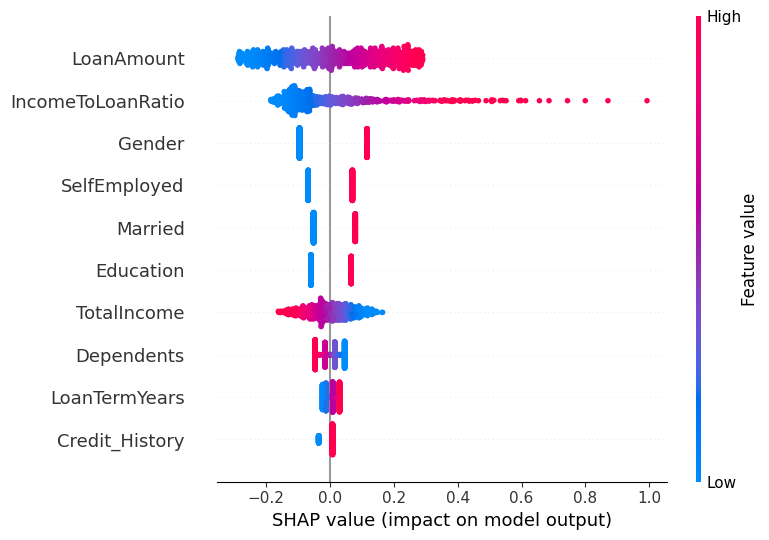

In [93]:
import shap

# Initialize the SHAP explainer for a linear model
explainer = shap.LinearExplainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot to show feature importance
shap.summary_plot(shap_values, X_test)


#### Interpretation 

LoanAmount: It is the most significant feature affecting the loan approval prediction. The higher the loan amount (indicated by red), the more likely it is to push the model towards rejecting the loan.

IncomeToLoanRatio: This feature also has a significant impact. Higher ratios (indicated by red) appear to increase the chances of loan approval, while lower ratios (indicated by blue) are associated with rejection.

Credit_History: This feature is crucial as well. The plot suggests that having a credit history (likely a binary feature) increases the likelihood of loan approval.

TotalIncome: Higher total income (red) positively influences the approval decision, while lower incomes (blue) tend to have the opposite effect.

In [97]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Example training data (replace with your actual data)
X_train = np.array([
    [100000, 0.2, 1, 0, 1, 1, 50000, 0, 10, 1],
    [200000, 0.3, 0, 1, 0, 0, 80000, 1, 15, 1],
    # Add more training samples here
])
y_train = np.array([1, 0])  # Labels: 1 = Approved, 0 = Rejected

# Step 1: Fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 2: Train the model on the scaled data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 3: Define the prediction function
def predict_loan_approval(model, scaler, feature_input):
    """
    Predict whether a loan will be approved or not.
    """
    # Extract the feature values in the correct order
    features = np.array([
        feature_input['LoanAmount'],
        feature_input['IncomeToLoanRatio'],
        feature_input['Gender'],
        feature_input['SelfEmployed'],
        feature_input['Married'],
        feature_input['Education'],
        feature_input['TotalIncome'],
        feature_input['Dependents'],
        feature_input['LoanTermYears'],
        feature_input['Credit_History']
    ]).reshape(1, -1)
    
    # Normalize the input features using the fitted scaler
    features_scaled = scaler.transform(features)
    
    # Make the prediction
    prediction = model.predict(features_scaled)
    
    # Convert numeric prediction to human-readable output
    return 'Approved' if prediction == 1 else 'Rejected'

# Example of usage
example_input = {
    'LoanAmount': 120000,
    'IncomeToLoanRatio': 0.25,
    'Gender': 1,  # Assume 1 = Male, 0 = Female
    'SelfEmployed': 0,  # 0 = No, 1 = Yes
    'Married': 1,  # 1 = Married, 0 = Not Married
    'Education': 1,  # 1 = Graduate, 0 = Not Graduate
    'TotalIncome': 60000,
    'Dependents': 0,
    'LoanTermYears': 15,
    'Credit_History': 1  # 1 = Has Credit History, 0 = No Credit History
}

# Predict loan approval status
loan_status = predict_loan_approval(model, scaler, example_input)
print(f"Loan Status: {loan_status}")


Loan Status: Approved
